<a href="https://colab.research.google.com/github/gupta24789/Data_Science_Projects/blob/master/colab_notebooks/text_classification_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# pip install tensorflow-gpu==2.0.0

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline

print("Tensorflow Version :", tf.__version__)

Tensorflow Version : 2.0.0


In [0]:
def plot_metrics(history):
  ### Plot the loss and accuracy

  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(12,9))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(12,9))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.ylim((0.5,1))
  plt.show()

In [5]:
## List all the datasets in tensorflow
tfds.list_builders()[:3]

['abstract_reasoning', 'aflw2k3d', 'amazon_us_reviews']

In [6]:
## Learning embeddings from scratch
imdb , info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised=True)
train_data, test_data = imdb["train"], imdb["test"]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [7]:
## get the encoder 
encoder = info.features['text'].encoder

## "_" represents the space
encoder.subwords[:5]

['the_', ', ', '. ', 'a_', 'and_']

In [0]:
BUFFER_SIZE = 1000
BATCH_SIZE = 10
EMBEDDING_DIM = 16

In [0]:
## Following things should be done before modeling
## 1. Shuffle
## 2. Batch
## 3. Length should be same for every input (Padding)

In [0]:
## Method - 1
train_data = train_data.shuffle(BUFFER_SIZE)
test_data = test_data.shuffle(BUFFER_SIZE)
train_batches = train_data.padded_batch(BATCH_SIZE, padded_shapes = train_data.output_shapes)
test_batches = train_data.padded_batch(BATCH_SIZE,padded_shapes = test_data.output_shapes)

Epoch 1/5
2500/2500 [==============================] - 726s 291ms/step - loss: 0.5594 - accuracy: 0.7113 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
2500/2500 [==============================] - 714s 286ms/step - loss: 0.4084 - accuracy: 0.8251 - val_loss: 0.3457 - val_accuracy: 0.8780
Epoch 3/5
2500/2500 [==============================] - 705s 282ms/step - loss: 0.3833 - accuracy: 0.8376 - val_loss: 0.4439 - val_accuracy: 0.8004
Epoch 4/5
2500/2500 [==============================] - 715s 286ms/step - loss: 0.4943 - accuracy: 0.7655 - val_loss: 0.4039 - val_accuracy: 0.8206
Epoch 5/5
2500/2500 [==============================] - 712s 285ms/step - loss: 0.2784 - accuracy: 0.8862 - val_loss: 0.1859 - val_accuracy: 0.9350


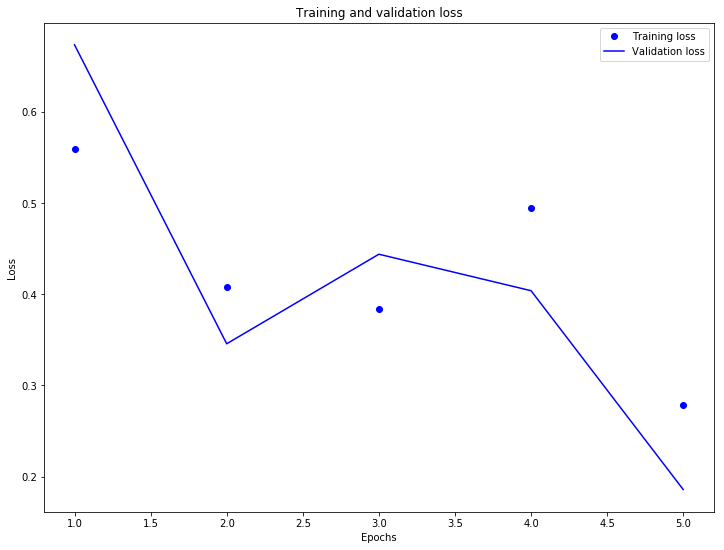

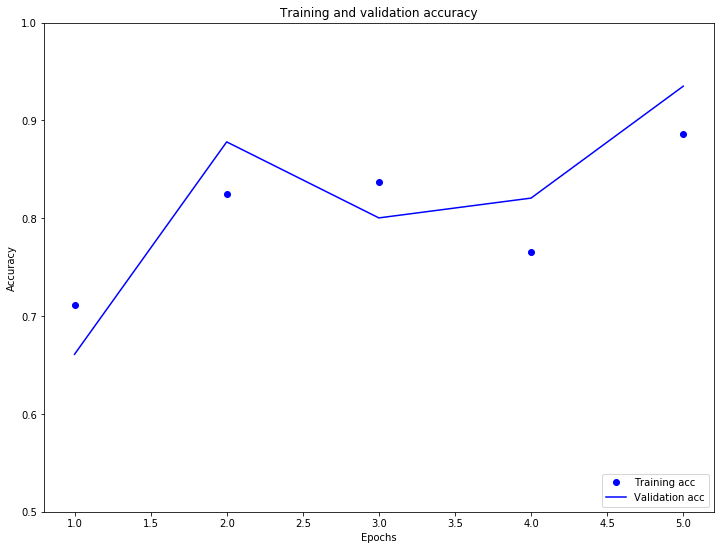

In [11]:
## Create Simple RNN Model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(encoder.vocab_size, EMBEDDING_DIM),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid')                 
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_batches, validation_data = test_batches, epochs = 5)

## Plot
plot_metrics(history)

In [0]:
# ## Create Simple Stacked RNN Model
# tf.keras.backend.clear_session()
# model = tf.keras.models.Sequential([
#                 tf.keras.layers.Embedding(encoder.vocab_size, EMBEDDING_DIM),
#                 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
#                 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
#                 tf.keras.layers.Dense(64, activation='relu'),
#                 tf.keras.layers.Dense(1, activation='sigmoid')                 
# ])

# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# history = model.fit(train_batches, validation_data = test_batches, epochs = 5)

# ## Plot
# plot_metrics(history)